In [10]:
# الخلية 1: استيراد المكتبات
import pandas as pd
import joblib
from sklearn.metrics import (
    accuracy_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# الخلية 2: تحميل النموذج والأدوات
model = joblib.load('../models/language_model.pkl')
vectorizer = joblib.load('../models/vectorizer.pkl')
data = pd.read_csv('../data/cleaned_language_data.csv')


In [12]:
# الخلية 3: تحميل بيانات الاختبار
X_test = data['cleaned_text']
X_test = X_test.fillna("")
y_test = data['Language']

X_test_vec = vectorizer.transform(X_test)
y_pred = model.predict(X_test_vec)


In [13]:
# الخلية 4: حساب دقة النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 دقة النموذج على كل البيانات: {accuracy:.4f}")

📊 دقة النموذج على كل البيانات: 0.9491


In [14]:
# الخلية 5: تقرير التصنيف التفصيلي
print("\n📋 تقرير التصنيف:")
print(classification_report(y_test, y_pred))


📋 تقرير التصنيف:
              precision    recall  f1-score   support

      Arabic       1.00      0.94      0.97       532
      Danish       1.00      0.91      0.95       424
       Dutch       1.00      0.95      0.98       542
     English       0.75      1.00      0.86      1382
      French       0.98      0.98      0.98      1007
      German       1.00      0.96      0.98       465
       Greek       1.00      0.94      0.97       358
       Hindi       1.00      0.98      0.99        62
     Italian       0.99      0.97      0.98       694
     Kannada       1.00      0.93      0.96       366
   Malayalam       1.00      0.88      0.94       591
  Portugeese       1.00      0.97      0.98       736
     Russian       1.00      0.92      0.96       688
     Spanish       0.98      0.96      0.97       816
    Sweedish       0.96      0.97      0.97       673
       Tamil       1.00      0.91      0.95       464
     Turkish       1.00      0.85      0.92       471

    accu

<Figure size 1200x1000 with 0 Axes>

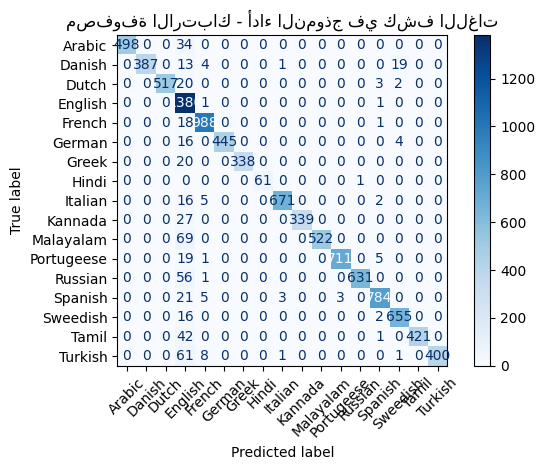

In [15]:
# الخلية 6: مصفوفة الارتباك
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(12, 10))
disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
plt.title('مصفوفة الارتباك - أداء النموذج في كشف اللغات')
plt.tight_layout()
plt.savefig('../docs/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# الخلية 7: اختبار النموذج على أمثلة جديدة
test_samples = [
    "Hello world, how are you today?",
    "الو السلام عليكم كيف الحال وأخباركم الطيببين",
    "Bonjour comment ça va",
    "Hola cómo estás hoy",
    "Mi piace molto mangiare la pizza, il gelato, e la pasta",
    "Привет, как дела?",
    "नमस्ते, मैं ठीक हूँ और आप कैसे हैं",
    " iyi çalışmalar ve bol şans diliyorum"
   
    
]

print("\n🧪 اختبار النموذج على نصوص جديدة:")
for i, text in enumerate(test_samples, 1):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)[0]
    confidence = model.predict_proba(text_vec).max()
    
    print(f"{i}. النص: '{text}'")
    print(f"   → اللغة: {prediction} (ثقة: {confidence:.2%})")
    print()


🧪 اختبار النموذج على نصوص جديدة:
1. النص: 'Hello world, how are you today?'
   → اللغة: English (ثقة: 89.23%)

2. النص: 'الو السلام عليكم كيف الحال وأخباركم الطيببين'
   → اللغة: Arabic (ثقة: 27.46%)

3. النص: 'Bonjour comment ça va'
   → اللغة: French (ثقة: 60.91%)

4. النص: 'Hola cómo estás hoy'
   → اللغة: Spanish (ثقة: 49.12%)

5. النص: 'Mi piace molto mangiare la pizza, il gelato, e la pasta'
   → اللغة: Italian (ثقة: 69.53%)

6. النص: 'Привет, как дела?'
   → اللغة: Russian (ثقة: 67.06%)

7. النص: 'नमस्ते, मैं ठीक हूँ और आप कैसे हैं'
   → اللغة: Hindi (ثقة: 10.83%)

8. النص: ' iyi çalışmalar ve bol şans diliyorum'
   → اللغة: Turkish (ثقة: 83.34%)



In [17]:
# الخلية 8: تحليل الأداء لكل لغة
language_accuracy = {}
for language in model.classes_:
    mask = y_test == language
    if mask.any():
        lang_accuracy = accuracy_score(y_test[mask], y_pred[mask])
        language_accuracy[language] = lang_accuracy

print("\n📈 دقة النموذج حسب اللغة:")
for language, acc in sorted(language_accuracy.items(), key=lambda x: x[1], reverse=True):
    print(f"   {language}: {acc:.2%}")


📈 دقة النموذج حسب اللغة:
   English: 99.86%
   Hindi: 98.39%
   French: 98.11%
   Sweedish: 97.33%
   Italian: 96.69%
   Portugeese: 96.60%
   Spanish: 96.08%
   German: 95.70%
   Dutch: 95.39%
   Greek: 94.41%
   Arabic: 93.61%
   Kannada: 92.62%
   Russian: 91.72%
   Danish: 91.27%
   Tamil: 90.73%
   Malayalam: 88.32%
   Turkish: 84.93%


In [18]:
# الخلية 9: حفظ تقرير التقييم
evaluation_report = {
    "overall_accuracy": accuracy,
    "language_wise_accuracy": language_accuracy,
    "test_samples_count": len(y_test),
    "model_type": type(model).__name__
}

print("\n✅ تم الانتهاء من تقييم النموذج!")


✅ تم الانتهاء من تقييم النموذج!
